
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

## 0. a)  

In [90]:
import pandas as pd

df = pd.read_csv("/Users/paraugustsson/Machine-learning-AI24-1/mpg.csv")  # Only reference 'data/' since .venv is the current folder
df.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [92]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [93]:
df.isnull().sum()
# Kontrollera saknade värden
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [94]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # This tells the imputer to replace NaN values with the mean of the column.
df['horsepower'] = imputer.fit_transform(df[['horsepower']]) # calculates mean of the column ignoring NaN-values and replaces them. 

df["horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

## 0. b)

In [95]:
# Select only relevant numerical columns for statistics
relevant_columns = ["mpg", "horsepower", "weight", "acceleration", "cylinders", "displacement",] # Remove catehorical and also year cause allthough numerical it represents categorical datat rather than continous.
df_relevant = df[relevant_columns]

# Get statistical summary
df_relevant.describe()

,mpg,horsepower,weight,acceleration,cylinders,displacement
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,104.469388,2970.424623,15.568090,5.454774,193.425879
std,7.815984,38.199187,846.841774,2.757689,1.701004,104.269838
min,9.000000,46.000000,1613.000000,8.000000,3.000000,68.000000
25%,17.500000,76.000000,2223.750000,13.825000,4.000000,104.250000
50%,23.000000,95.000000,2803.500000,15.500000,4.000000,148.500000
75%,29.000000,125.000000,3608.000000,17.175000,8.000000,262.000000
max,46.600000,230.000000,5140.000000,24.800000,8.000000,455.000000


## 0. c) 

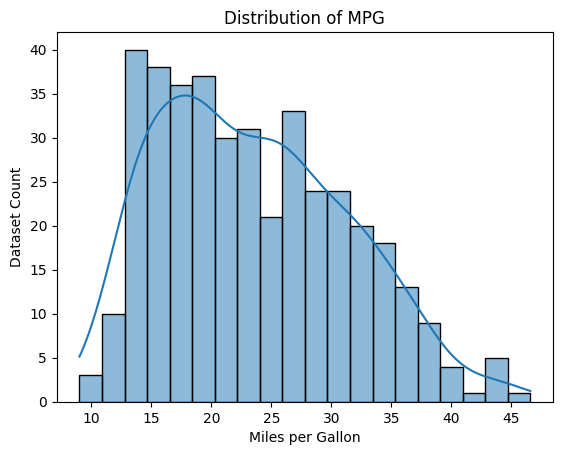

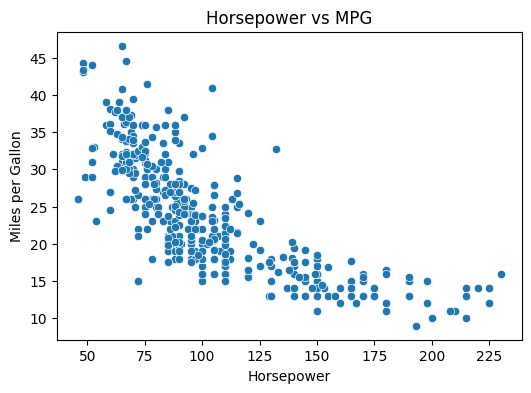

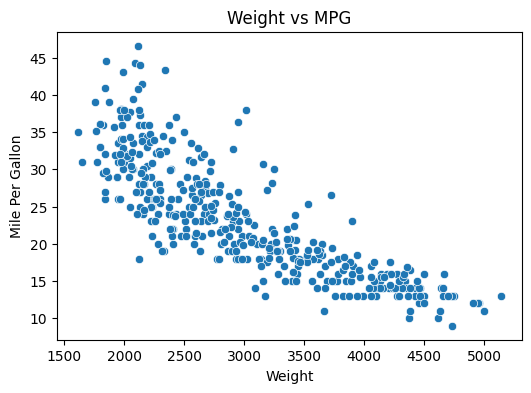

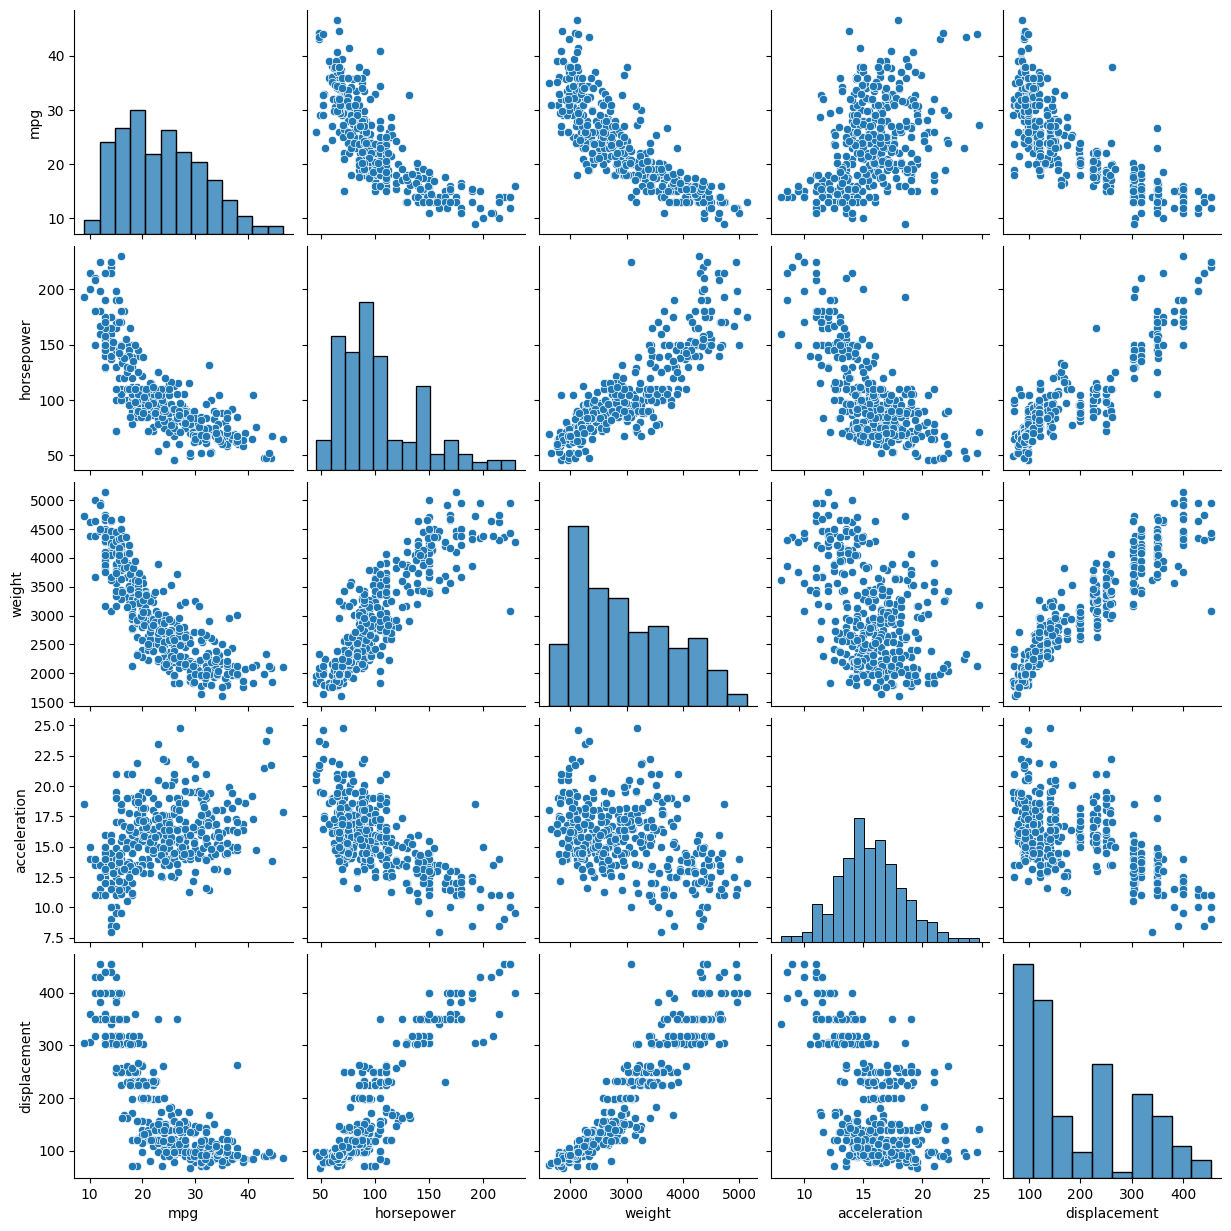

In [96]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Histogram of mpg 
plt.figure()
sns.histplot(df["mpg"], bins=20, kde=True)
plt.title("Distribution of MPG")
plt.xlabel("Miles per Gallon")
plt.ylabel("Dataset Count")
plt.show()

# Scatter plot: Horsepower vs MPG
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["horsepower"], y=df["mpg"])
plt.title("Horsepower vs MPG")
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["weight"], y=df["mpg"])
plt.title("Weight vs MPG")
plt.xlabel("Weight")
plt.ylabel("Mile Per Gallon")
plt.show()

# Pairplot to see relationships
sns.pairplot(df[["mpg", "horsepower", "weight", "acceleration", "displacement"]])
plt.show()


## 0. d)


In [97]:
# Check missing values
print(df.isnull().sum())

# Check unique values per column
print(df.nunique())

# Possible columns to drop:
drop_candidates = ["name", "origin"]  # Name is categorical and unlikely useful for regression

# Drop them if needed
df_cleaned = df.drop(columns=drop_candidates)

print("Columns after dropping:", df_cleaned.columns)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64
Columns after dropping: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')


## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [98]:
from sklearn.model_selection import train_test_split

df_auto = df_cleaned

# Define features (X) and target (y)
X = df_auto.drop(columns=["mpg"]) # features 
y = df_auto["mpg"] # Target variable 

# Split data into 80% tarin and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (318, 6)
X_test shape: (80, 6)
y_train shape: (318,)
y_test shape: (80,)


In [99]:
# Manually check test numbers  

#  Get total number of rows
total_rows = df.shape[0]

# Calculate expected train/test sizes
expected_train_size = int(total_rows * 0.8)
expected_test_size = total_rows - expected_train_size  # Remaining 20%

print("Expected train size:", expected_train_size)
print("Expected test size:", expected_test_size)

Expected train size: 318
Expected test size: 80


## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

## 2. )

In [100]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to train and evaluate regression model
def evaluate_regression_model(X_train, X_test, y_train, y_test, model):
    """
    Trains a regression model, makes predictions, and calculates MAE, MSE, RMSE.

    Parameters:
    X_train, X_test, y_train, y_test : Training and testing datasets
    model : Regression model instance

    Returns:
    dict : Containing MAE, MSE, RMSE
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error

    # Return metrics in a dictionary
    return {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Initialize Linear Regression model
linear_model = LinearRegression()

# Call the function and evaluate the model
regression_metrics = evaluate_regression_model(X_train, X_test, y_train, y_test, linear_model)

# Display results
regression_metrics

{'MAE': 2.4672660534140305,
 'MSE': 9.441014238263582,
 'RMSE': np.float64(3.0726233479330953)}

---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [107]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()

# Create polynomial feature transformers for degrees 1, 2, and 3
poly_1 = PolynomialFeatures(degree=1, include_bias=False)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)

# Define the models
models = {
    "Linear Regression (SVD)": LinearRegression(),
    "Linear Regression (SVD) - Scaled": make_pipeline(StandardScaler(), LinearRegression()),
    "Polynomial Regression (Degree 1)": make_pipeline(poly_1, LinearRegression()),
    "Polynomial Regression (Degree 2)": make_pipeline(poly_2, LinearRegression()),
    "Polynomial Regression (Degree 3)": make_pipeline(poly_3, LinearRegression()),
}

# Evaluate all models and store results
results = []
for name, model in models.items():
    metrics = evaluate_regression_model(X_train, X_test, y_train, y_test, model)
    metrics["Model"] = name
    results.append(metrics)

# Create a DataFrame with results
results_df = pd.DataFrame(results)

# Set "Model" as index and transpose to match the desired format
formatted_df = results_df.set_index("Model").T

# Round values for better readability
formatted_df = formatted_df.round(5)  # Adjust decimal places as needed

# Display the table
from IPython.display import display

# Display the formatted DataFrame
display(formatted_df)

# Display the results
print(results_df)

# Return the best-performing model based on RMSE (lower is better)
best_model = results_df.loc[results_df["RMSE"].idxmin()]
print("\nBest Model:\n", best_model)

Model,Linear Regression (SVD),Linear Regression (SVD) - Scaled,Polynomial Regression (Degree 1),Polynomial Regression (Degree 2),Polynomial Regression (Degree 3)
MAE,2.46727,2.46727,2.46727,1.94137,2.01324
MSE,9.44101,9.44101,9.44101,7.05129,8.00534
RMSE,3.07262,3.07262,3.07262,2.65543,2.82937


        MAE       MSE      RMSE                             Model
0  2.467266  9.441014  3.072623           Linear Regression (SVD)
1  2.467266  9.441014  3.072623  Linear Regression (SVD) - Scaled
2  2.467266  9.441014  3.072623  Polynomial Regression (Degree 1)
3  1.941372  7.051287  2.655426  Polynomial Regression (Degree 2)
4  2.013236  8.005339  2.829371  Polynomial Regression (Degree 3)

Best Model:
 MAE                              1.941372
MSE                              7.051287
RMSE                             2.655426
Model    Polynomial Regression (Degree 2)
Name: 3, dtype: object



## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---